# MAMAN 21 - Data mining
Volkov Vadim

320682214

*Please open this notebook in Google-Colab, for there might be formatting issues with other programs.

# Import of the data and libraries


In [1]:
!pip uninstall scikit-learn -y

!pip install -U scikit-learn

Found existing installation: scikit-learn 1.4.2
Uninstalling scikit-learn-1.4.2:
  Successfully uninstalled scikit-learn-1.4.2
  Using cached scikit_learn-1.4.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)


In [157]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import numpy as np
import ipywidgets as widgets
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_auc_score
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.datasets import load_credit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import tree

In [3]:
df = pd.read_csv('/content/thyroid0387.csv')

Next replace the '?' entries with 'NaN' of numpy so pandas will recongize missing values.

In [4]:
df.replace('?', np.NaN, inplace = True)

In [5]:
for coulmn in ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG' ]:
  df[coulmn] = pd.to_numeric(df[coulmn])

In [6]:
df

age sex on thyroxine query on thyroxine on antithyroid medication sick  \
0      29   F            f                  f                         f    f   
1      29   F            f                  f                         f    f   
2      41   F            f                  f                         f    f   
3      36   F            f                  f                         f    f   
4      32   F            f                  f                         f    f   
...   ...  ..          ...                ...                       ...  ...   
9167   56   M            f                  f                         f    f   
9168   22   M            f                  f                         f    f   
9169   69   M            f                  f                         f    f   
9170   47   F            f                  f                         f    f   
9171   31   M            f                  f                         f    f   

     pregnant thyroid surgery I131 treatment query hypothyroid  ...  \
0           f               f              f                 t  ...   
1           f               f              f                 f  ...   
2           f               f              f                 f  ...   
3           f               f              f                 f  ...   
4           f               f              f                 f  ...   
...       ...             ...            ...               ...  ...   
9167        f               f              f                 f  ...   
9168        f               f              f                 f  ...   
9169        f               f              f                 f  ...   
9170        f               f              f                 f  ...   
9171        f               f              f                 t  ...   

     TT4 measured    TT4 T4U measured   T4U FTI measured   FTI TBG measured  \
0               f    NaN            f   NaN            f   NaN            f   
1               t  128.0            f   NaN            f   NaN            f   
2               f    NaN            f   NaN            f   NaN            t   
3               f    NaN            f   NaN            f   NaN            t   
4               f    NaN            f   NaN            f   NaN            t   
...           ...    ...          ...   ...          ...   ...          ...   
9167            t   64.0            t  0.83            t  77.0            f   
9168            t   91.0            t  0.92            t  99.0            f   
9169            t  113.0            t  1.27            t  89.0            f   
9170            t   75.0            t  0.85            t  88.0            f   
9171            t   66.0            t  1.02            t  65.0            f   

       TBG referral source  diagnoses [record identification]  
0      NaN           other                       -[840801013]  
1      NaN           other                       -[840801014]  
2     11.0           other                       -[840801042]  
3     26.0           other                       -[840803046]  
4     36.0           other                       S[840803047]  
...    ...             ...                                ...  
9167   NaN             SVI                       -[870119022]  
9168   NaN             SVI                       -[870119023]  
9169   NaN             SVI                       I[870119025]  
9170   NaN           other                       -[870119027]  
9171   NaN           other                       -[870119035]  

[9172 rows x 30 columns]

Next remove the [record identification] which is not needed for us:

In [7]:
df["diagnoses [record identification]"] = df["diagnoses [record identification]"].apply(lambda string: string[:string.find('[')]) # removes what is in the brackets including them
df.rename(columns = {"diagnoses [record identification]" : "diagnosis"}, inplace = True) # rename the column

In [8]:
df

age sex on thyroxine query on thyroxine on antithyroid medication sick  \
0      29   F            f                  f                         f    f   
1      29   F            f                  f                         f    f   
2      41   F            f                  f                         f    f   
3      36   F            f                  f                         f    f   
4      32   F            f                  f                         f    f   
...   ...  ..          ...                ...                       ...  ...   
9167   56   M            f                  f                         f    f   
9168   22   M            f                  f                         f    f   
9169   69   M            f                  f                         f    f   
9170   47   F            f                  f                         f    f   
9171   31   M            f                  f                         f    f   

     pregnant thyroid surgery I131 treatment query hypothyroid  ...  \
0           f               f              f                 t  ...   
1           f               f              f                 f  ...   
2           f               f              f                 f  ...   
3           f               f              f                 f  ...   
4           f               f              f                 f  ...   
...       ...             ...            ...               ...  ...   
9167        f               f              f                 f  ...   
9168        f               f              f                 f  ...   
9169        f               f              f                 f  ...   
9170        f               f              f                 f  ...   
9171        f               f              f                 t  ...   

     TT4 measured    TT4 T4U measured   T4U FTI measured   FTI TBG measured  \
0               f    NaN            f   NaN            f   NaN            f   
1               t  128.0            f   NaN            f   NaN            f   
2               f    NaN            f   NaN            f   NaN            t   
3               f    NaN            f   NaN            f   NaN            t   
4               f    NaN            f   NaN            f   NaN            t   
...           ...    ...          ...   ...          ...   ...          ...   
9167            t   64.0            t  0.83            t  77.0            f   
9168            t   91.0            t  0.92            t  99.0            f   
9169            t  113.0            t  1.27            t  89.0            f   
9170            t   75.0            t  0.85            t  88.0            f   
9171            t   66.0            t  1.02            t  65.0            f   

       TBG referral source  diagnosis  
0      NaN           other          -  
1      NaN           other          -  
2     11.0           other          -  
3     26.0           other          -  
4     36.0           other          S  
...    ...             ...        ...  
9167   NaN             SVI          -  
9168   NaN             SVI          -  
9169   NaN             SVI          I  
9170   NaN           other          -  
9171   NaN           other          -  

[9172 rows x 30 columns]

# Problem Definition -

In this dataset we have 9172 samples and 30 features.

The aim of this project/research is to classify the patients thyroid function into three categories:

1. Normal function
2. Hyperhyroidsim
3. Hypothyroidism



# Feature definition (Types, values, ranges, etc....) -

## Missing values:

In this section we will check the number of missing values in each feature:

In [9]:
df.isnull().sum()

age                             0
sex                           307
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           842
T3 measured                     0
T3                           2604
TT4 measured                    0
TT4                           442
T4U measured                    0
T4U                           809
FTI measured                    0
FTI                           802
TBG measured                    0
TBG                          8823
referral source                 0
diagnosis     

As we can see we have a pretty significant count of missing values on the TBG feature and T3, Also moderate missing count on TSH, TT4, F4U, T4U, FTI.

## Value/Range of the features:

## Numerical type features:

From the attached README file we know that  'age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG' are numerial variables/features, so will look at their properties:

In [10]:
df.describe()

age          TSH           T3          TT4          T4U  \
count   9172.000000  8330.000000  6568.000000  8730.000000  8363.000000   
mean      73.555822     5.218403     1.970629   108.700305     0.976056   
std     1183.976718    24.184006     0.887579    37.522670     0.200360   
min        1.000000     0.005000     0.050000     2.000000     0.170000   
25%       37.000000     0.460000     1.500000    87.000000     0.860000   
50%       55.000000     1.400000     1.900000   104.000000     0.960000   
75%       68.000000     2.700000     2.300000   126.000000     1.065000   
max    65526.000000   530.000000    18.000000   600.000000     2.330000   

               FTI         TBG  
count  8370.000000  349.000000  
mean    113.640746   29.870057  
std      41.551650   21.080504  
min       1.400000    0.100000  
25%      93.000000   21.000000  
50%     109.000000   26.000000  
75%     128.000000   31.000000  
max     881.000000  200.000000

We can already see, that in realtion to the mean and the quartiles, we have outliers in everyone of the features above.

## Categorical type features -

### "sex" feature -

<Axes: xlabel='sex', ylabel='count'>

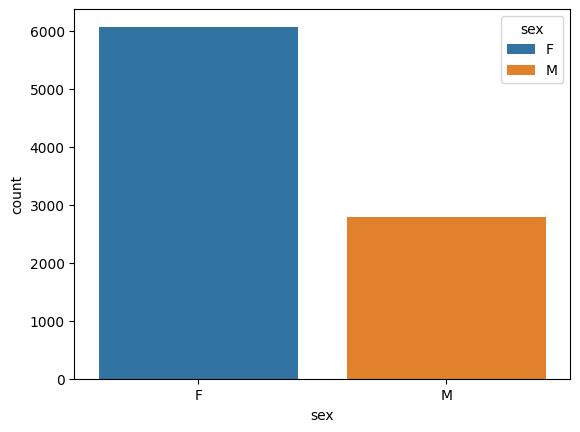

In [11]:
sns.countplot(data = df, x = "sex", hue = "sex")

As we can see we have an imbalance in the "sex" feature, the majority of the subjects are female.
We have about 67% female subjects which may affect the models prediction accuracy for men.

### "on thyroxine" feature -

<Axes: xlabel='on thyroxine', ylabel='count'>

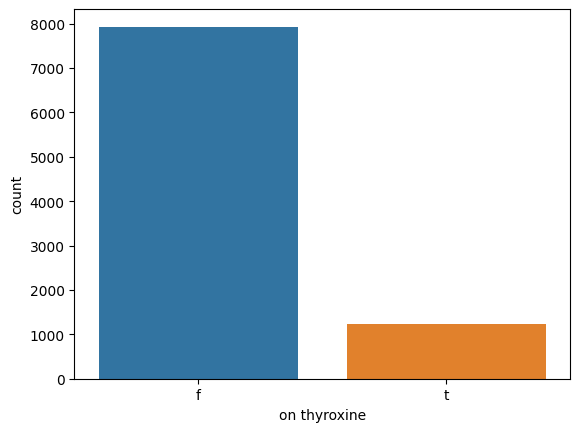

In [12]:
sns.countplot(data = df, x = "on thyroxine", hue = "on thyroxine")

We can can see that this feature is somewhat balanced and maybe a representative sample, because the majority of people outside the scope of the study arent on thyroxide medication.

### "query on thyroxine" feature -

<Axes: xlabel='query on thyroxine', ylabel='count'>

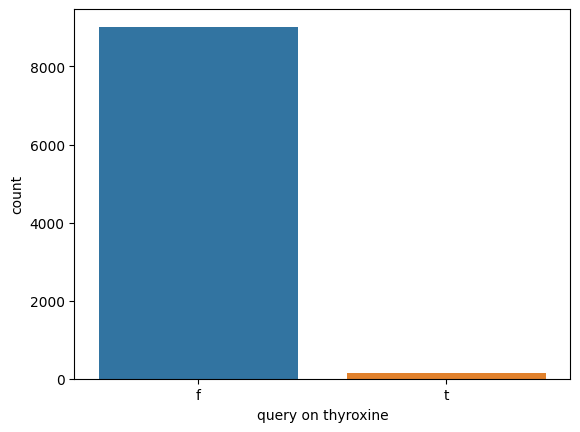

In [13]:
sns.countplot(data = df, x = "query on thyroxine", hue = "query on thyroxine")

We can can see that this feature is somewhat balanced and maybe a representative sample, because the majority of people outside the scope of the study arent on thyroxide medication and dont neet query on thyroxine to dosaging.

### "on antithyroid medication" feature -

<Axes: xlabel='on antithyroid medication', ylabel='count'>

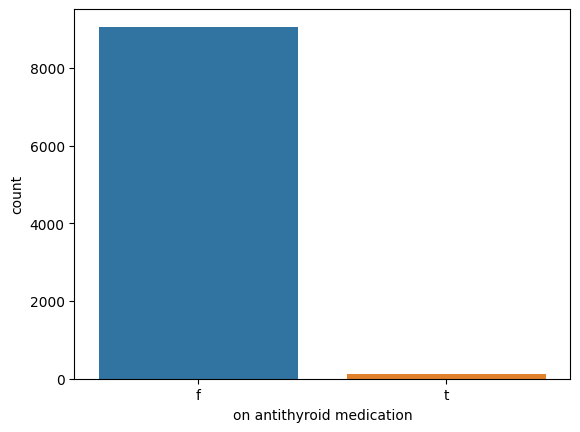

In [14]:
sns.countplot(data = df, x = "on antithyroid medication", hue = "on antithyroid medication")

Also a reasonble result, for not many people of of the pouplation have tyroid conditions, so it's somewhat a representative sample.

### "sick" feature -

<Axes: xlabel='sick', ylabel='count'>

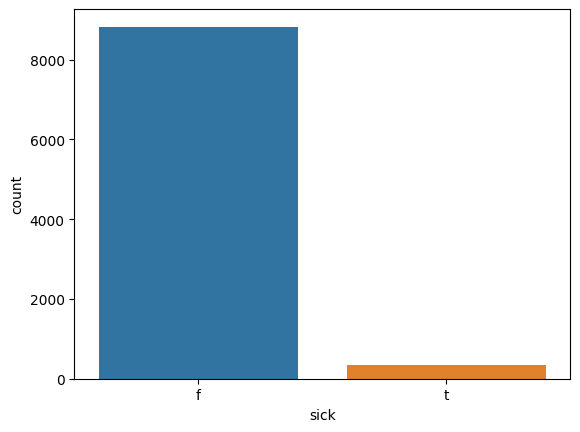

In [15]:
sns.countplot(data = df, x = "sick", hue = "sick")

Also a reasonble result, for not many people of of the pouplation is sick, so it's somewhat a representative sample.

### "pregnant" feature -

<Axes: xlabel='pregnant', ylabel='count'>

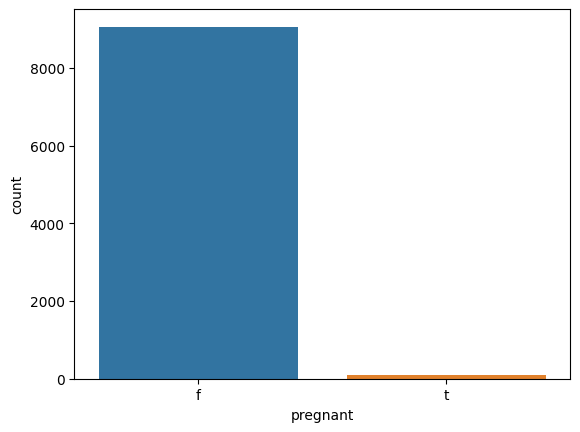

In [16]:
sns.countplot(data = df, x = "pregnant", hue = "pregnant")

### "thyroid surgery" feature -

<Axes: xlabel='thyroid surgery', ylabel='count'>

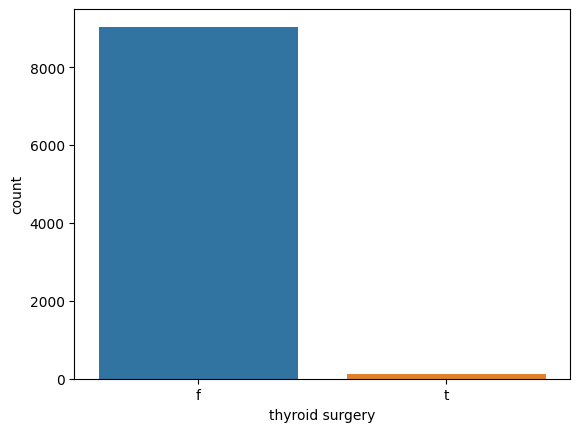

In [17]:
sns.countplot(data = df, x = "thyroid surgery", hue = "thyroid surgery")

### "I131 treatment" feature -

<Axes: xlabel='I131 treatment', ylabel='count'>

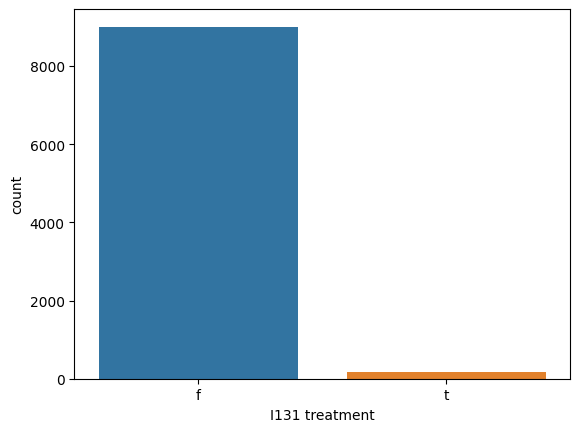

In [18]:
sns.countplot(data = df, x = "I131 treatment", hue = "I131 treatment")

### "query hypothyroid" feature -

<Axes: xlabel='query hypothyroid', ylabel='count'>

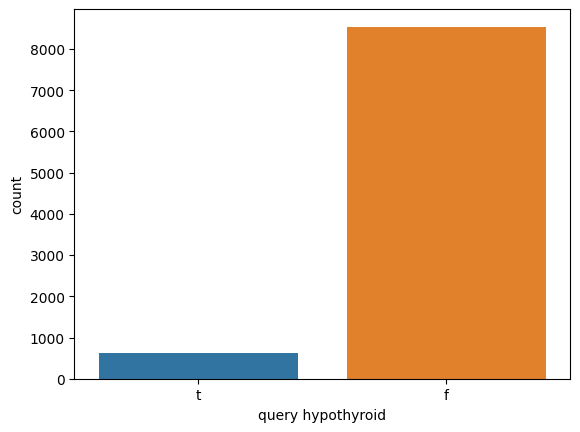

In [19]:
sns.countplot(data = df, x = "query hypothyroid", hue = "query hypothyroid")

### "query hyperthyroid" feature -

<Axes: xlabel='query hyperthyroid', ylabel='count'>

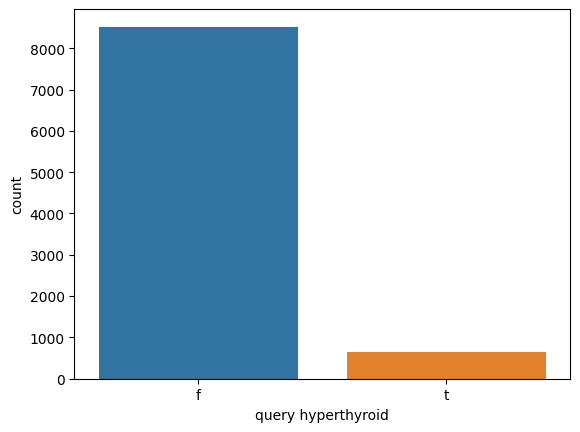

In [20]:
sns.countplot(data = df, x = "query hyperthyroid", hue = "query hyperthyroid")

### "lithium" feature -

<Axes: xlabel='lithium', ylabel='count'>

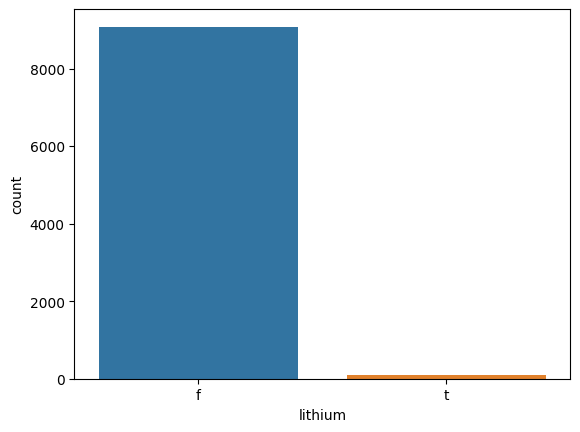

In [21]:
sns.countplot(data = df, x = "lithium", hue = "lithium")

### "goitre" feature -

<Axes: xlabel='goitre', ylabel='count'>

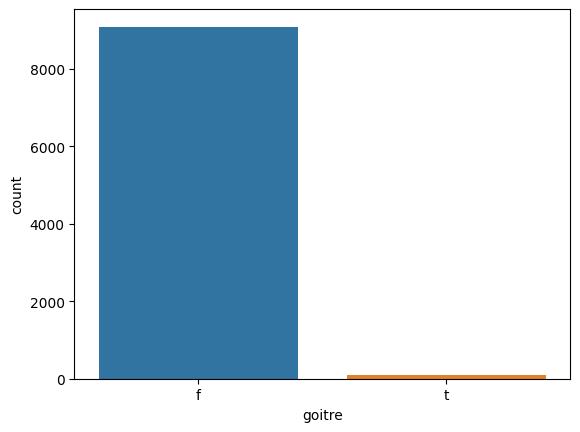

In [22]:
sns.countplot(data = df, x = "goitre", hue = "goitre")

### "tumor" feature -

<Axes: xlabel='tumor', ylabel='count'>

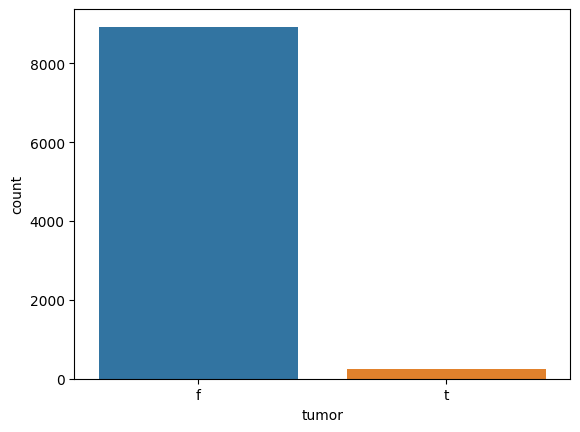

In [23]:
sns.countplot(data = df, x = "tumor", hue = "tumor")

### "hypopituitary" feature -

<Axes: xlabel='hypopituitary', ylabel='count'>

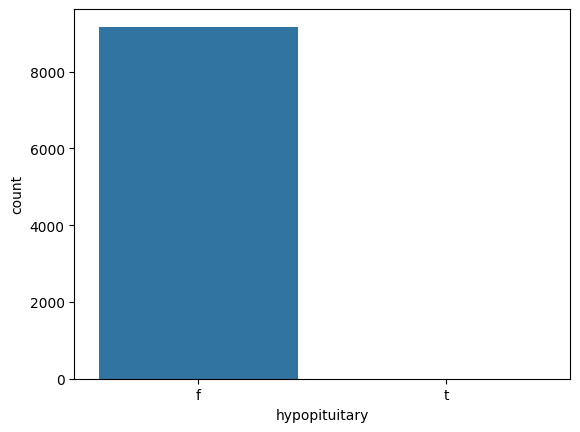

In [24]:
sns.countplot(data = df, x = "hypopituitary", hue = "hypopituitary")

### "psych" feature -

<Axes: xlabel='psych', ylabel='count'>

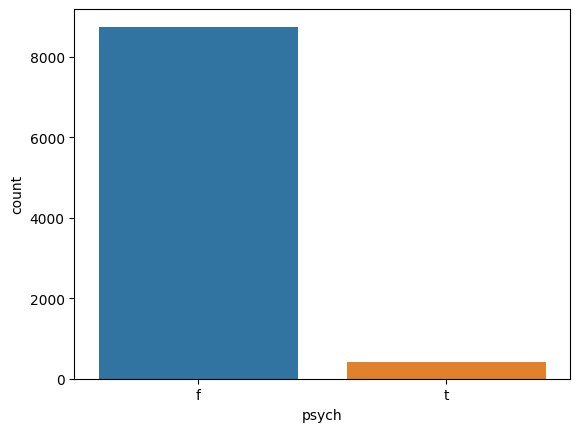

In [25]:
sns.countplot(data = df, x = "psych", hue = "psych")

### "TSH measured" feature -

<Axes: xlabel='TSH measured', ylabel='count'>

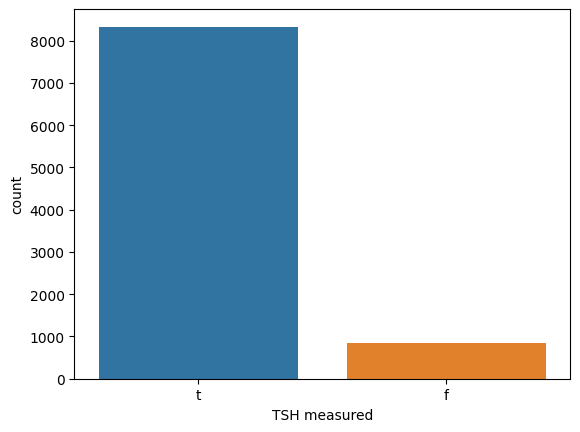

In [26]:
sns.countplot(data = df, x = "TSH measured", hue = "TSH measured")

### "T3 measured" feature -

<Axes: xlabel='T3 measured', ylabel='count'>

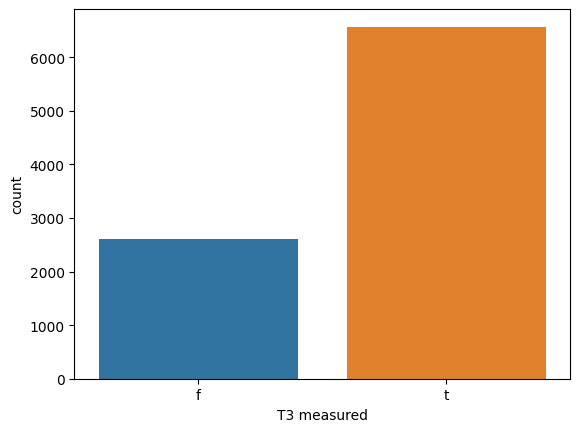

In [27]:
sns.countplot(data = df, x = "T3 measured", hue = "T3 measured")

### "TT4 measured" feature -

<Axes: xlabel='TT4 measured', ylabel='count'>

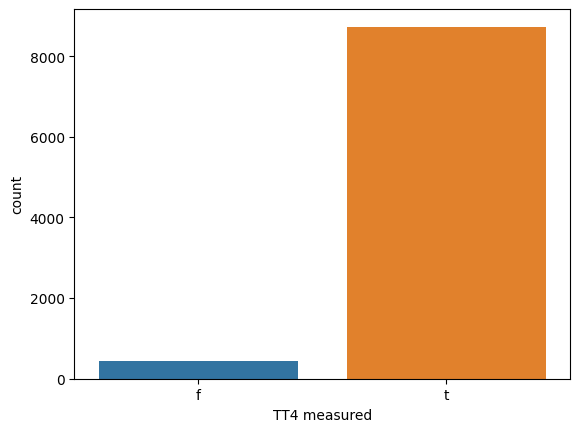

In [28]:
sns.countplot(data = df, x = "TT4 measured", hue = "TT4 measured")

### "FTI measured" feature -

<Axes: xlabel='FTI measured', ylabel='count'>

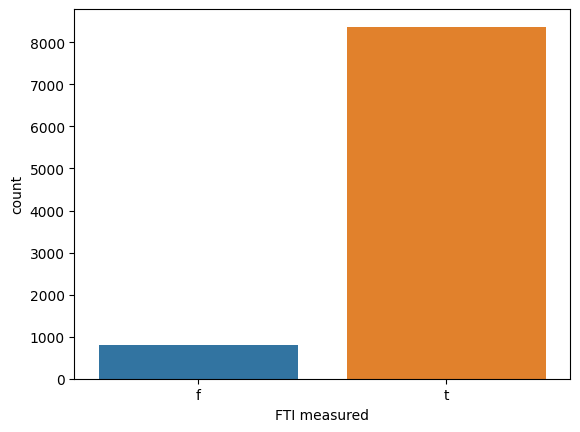

In [29]:
sns.countplot(data = df, x = "FTI measured", hue = "FTI measured")

### "TBG measured" feature -

<Axes: xlabel='TBG measured', ylabel='count'>

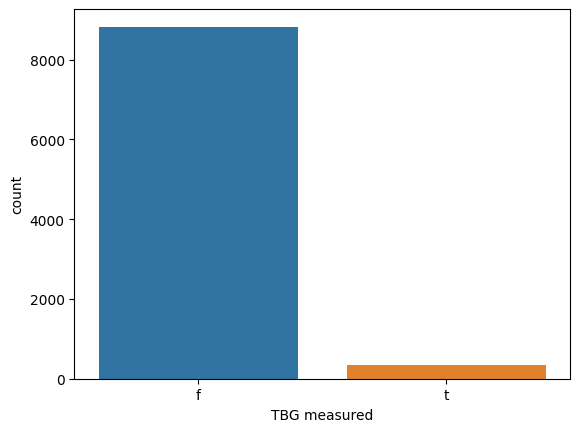

In [30]:
sns.countplot(data = df, x = "TBG measured", hue = "TBG measured")

A strange graph, the study aims to diagnose the subjects with thyroid conditions, and although the TBG is a biomarker for thyroxine, we can see that it's almost not measurable within the study in relation to the other biomarkers. A reasonable deduction will be is that the researchers deem it not as important as the others.

This feature is a candidate for not being part of the model.

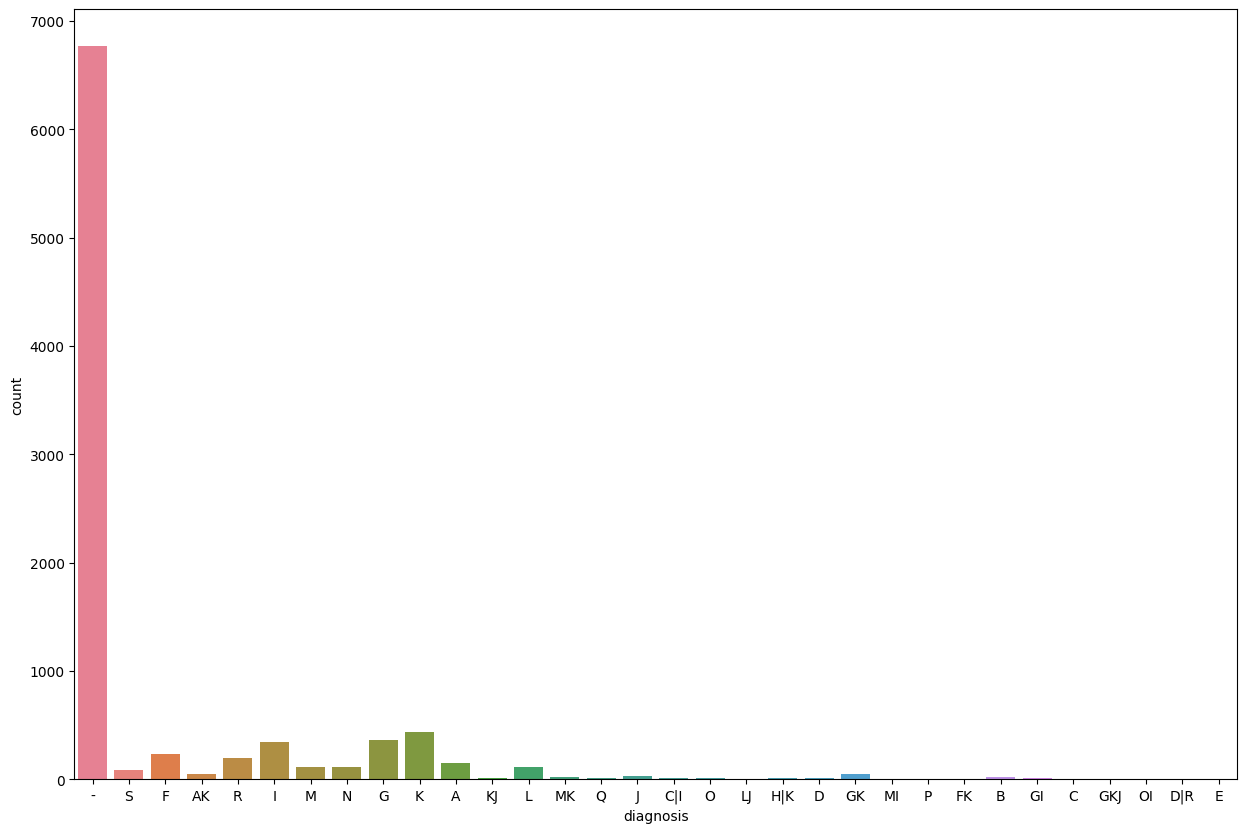

In [31]:
plt.figure(figsize=(15, 10))
sns.countplot(data = df, x = "diagnosis", hue = "diagnosis")
plt.show()

We can the that almost every one in the study group isn't diagnosed with a thyroid condition, which is expected if subjects were ramdonly sampled for representative sample.

But such a big differences in group size will impact the models performance and tend to generalize the normal group better and under classify the problematic thyroid conditions.

Which from a medical perspective is not good, because we ought to better classify the sick people correctly, even if we miscalssify the healthy subjects as having a condition. Because those the subject that have 'real' thyroid condition need to address is as soon as possible.

So besides judging the model based on the accuracy score we will need also to weigh the recall score more heavily.(Note the the recall might be also presicion it depends on how we classify the postive class)

## Summary table of the features

Feature | Description | Type  | Value/Range | Missing value count
--------|-------------|-------------|-------|------
age | The subjects age | Discrete | 1 - 65526 | 0
sex | The subjects sex | Nomial | M, F | 307
on thyroxine | The subject is on thyroxine medication to treat hypothyroidism | Nomial | f, t | 0
query on thyroxine | The subject is still in the process of adjusting the dosage of the thyroxine | Nomial | f, t | 0
on antithyroid medication| The subject is taking medicaion to treat hyperthyroidism | Nomial | f, t | 0
sick | The sunject overall health at the time of experiment | Nomial | f, t | 0
pregnant | The subject(female) is pregnant | Nomial | f, t | 0
thyroid surgery | The subject has experienced thyroid surgery because of verious conditions tumors or hyperthyrodism | Nomial |  f, t | 0
I131 treatment | The subject is on a I-131 Radiotherapy for hyperthyroidism and thyroid cancer treatment | Nomial | f, t | 0
query hypothyroid |  The subject is still in the process of adjusting the dosage for treating hypothyroidism  | Nomial | f, t | 0
query hyperthyroid | The subject is still in the process of adjusting the dosage for treating hyperthyroidism  | Nomial | f, t | 0
lithium | The subject is taking lithium as an antithyroid  medication | Nomial | f, t | 0
goitre | The subject has an enlarged thyroid gland | Nomial | f, t | 0
tumor | The subject has a tumor in the thyroid gland | Nomial | f, t | 0
hypopituitary | The subject underproduces the normal amounts of some or all of its hormones | Nomial | f, t | 0
psych |The subject experiences psychological conditions | Nomial | f, t | 0
TSH measured | The subject has taken measurement of TSH | Nomial | f, t | 0
TSH | The subjects TSH levels | Continuous | 0.005 - 530 | 842
T3 measured | The subject has taken measurement of T3 | Nomial | f, t | 0
T3 | The subjects T3 levels | Continuous | 0.05 - 18 | 2604
TT4 measured | The subject has taken measurement of TT4 | Nomial | f, t | 0
TT4 | The subjects TT4 levels | Continuous | 2 - 600 | 442
T4U measured | The subject has taken measurement of T4U | Nomial | f, t | 0
T4U | The subjects T4U levels | Continuous | 0.17 - 2.33 | 809
FTI measured | The subject has taken measurement of FTI | Nomial | f, t | 0
FTI | The subjects FTI levels | Continuous | 1.4 - 881 | 802
TBG measured | The subject has taken measurement of TBG | Nomial | f, t | 0
TBG | The subjects TBG levels | Continuous | 0.1 - 200 | 8823
referral source | The subject referral source | Nomial | WEST, STMW, SVHC, SVI, SVHD, other | 0
diagnosis | The subejct diagnosis with record number(in the [ ] brackets) | Nomial | A-T ( Latin alphabet ) and X/Y when X or Y are in the same range (A-T) | 0


Summary of the data so far:

* Note that in this section we only take a glimpse at the data, checking each variable individually, to understand them more generally and their trend/tendency without looking for correlations, dependant veriables etc...

1. We can see that we surely that we have outliers in the numerical veriables, we will need to adress them carefuly.

2. We see that the gender of the subjects have a bias/tendecy to be a female, which may impact the prediction on the male subject.

3. Most of the biomarkers for the thyriod are sampled besides "TBG", we will assume that the researcehrs deem the other biomarker to be importatnt. We will use them and drop the "TBG" feature (it add mostly noise).

4. Categorical features for having a condition that almost all on its values in one category (i.e almost averything is false), may be a candidate for dropping, because it adds mostly noise and doesnt contribute for to reduce the entropy. later we'll look into them in combination with the predicted feature so see if it may hold valuable data for us.

5. Notice that we have alot of features that represent the same behevior, for example 'query hypothyroid' 'query on thyroxine', 'on thyroxine' imply that the indevidual has hypothyroid condition.
The same applies to 'lithium', 'query hyperthyroid','on antithyroid medication' are all of the smae category, methods to comabat hyperthyroidsm.


# Description of the KDD procedure:

## 1. Selection

The selection of the data set is a crucial step in the process that often determines the results. For example, the choice of time frame for the data analysis — whether to analyze data from one month, one year or two years ago — can significantly influence the results. On the one hand, a longer time frame leads to a model that is based on more observations and is theoretically more precise, but on the other hand there is a risk that irrelevant data will be included. Conversely, one could set a target for the amount of data and examine more cases worldwide until this target is reached.

Furthermore, the selection of features for the classification is crucial. In our case, we have received a large number of databases and our task is to select the most appropriate, the most relevant, etc.

In this case the advised dataset to work with is the thyroid0387 datset.

* Note that in this step we only review, look generally at all of the variables.

## 2. Preprocessing

After selecting the data, the next step is data preprocessing. This step involves cleaning the data, removing outliers, and removing missing, inconsistent, or irrelevant data. This step is critical, as the data quality can significantly impact the accuracy and effectiveness of the analysis.

In general, we look for records with inappropriate values or inconsistencies (e.g. we saw a person aged 65526 years), look for records with missing values and decide how to treat them (whether and how to fill them or not), and decide on features or rows with irrelevant information that we don't want to proceed with.

## 3. Transformation

After the data has been pre-proccessed, the next step is to transform it into a format that data mining techniques can analyze. This step involves reducing the data dimensionality, aggregating the data, normalizing it, and discretizing it to prepare it for further analysis. In this project were ought to use discretization techniques because well work with decision trees and it may benefit out models.

## 4. Data Mining -

At this stage, we must first decide what we want to do, because there are several families of algorithms that perform different tasks (classification, prediction, clustering, etc.), and each algorithm has a different ability to maximize different things.

Based on the amount of data we have available, we divide the information into training and test data, running the algorithm on the training set and evaluating the accuracy on the test set.

Next, we select an algorithm to use based on the information we have and run it.

It is important to note that in many cases for the groundwork, it is necessary to run multiple algorithms or the same algorithm with different parameters to find the algorithm that gives the optimal result for our case and data.

## 5. Pattern Evaluation

After data mining, the next step is to evaluate the discovered patterns to determine their usefulness and relevance. This includes assessing the quality of the patterns, evaluating their significance and selecting the most promising patterns for further analysis.

## 6. REPEAT!

Even if we have done all the steps, it does not mean that we have completed the cycle, but that we have not tried all the possibilities and have not obtained the results we want or need.

The KDD process is an iterative process where with each iteration we may (or may not) uncover another layer (or several layers) of data, based on new iterations and new patterns from the previous cycles.

After we get the results we want or have tried all our options, we can work out the results in a more human form, such as Dashobard, etc.

# Discussion of appropriate intelligent methods(or models) for Data Mining

In this section we will create a discussion for four intelligent methods(or models) from the Decision Tree class.

## 1. ID3 Decision Tree (Information Gain based)-

ID3 is an algorithm for creating a decision tree. This algorithm selects one feature at a time for "splitting" and chooses the feature with the highest information gain. This value represents the improvement in entropy, i.e. the reduction in uncertainty by splitting on this feature. In this way, a decision tree can be created that attempts to classify the data based on the given features.

However, as mentioned above, ID3 does not perform pruning at the end of the process and can therefore lead to overfitting.

## 2. C4.5 Decision Tree -

C4.5 is an algorithm for creating decision trees that improves on the ID3 algorithm. In contrast to ID3, this tree performs pruning by attempting to replace leaf nodes and checking for significant damage.

In addition, this tree supports missing values and is very well suited for working with numeric attributes. In view of these improvements, C4.5 is preferred over ID3. The algorithm builds the decision tree from top to bottom and uses the information gain to find split points for each attribute. It performs pruning and thus helps to solve the problem of overfitting by removing branches with low importance and thus creating a more general model.

## 3. CART Decision Tree (GINI index based)

CART is a group of decision trees. In this case, a decision tree is analyzed on the basis of the GINI index. This index checks the "purity" of the information, i.e. we get a higher (lower) "good" score if in the chosen split a higher percentage comes from one category, and reach 0 if all values come from exactly one category.

This algorithm is known for its versatility in processing both categorical and continuous features. Its interpretability and ability to capture non-linear relationships between features and the target variable make it a powerful and popular choice in various domains.

In addition, this algorithm creates a binary tree, a property that can help to create a more general model and not risk a large amount of overfitting.

## 4. Random Forest Decision Tree -

Random forest is a machine learning algorithm that combines the predictions of multiple decision trees to produce a final result that is usually determined by mode of the individual predictions.

This algorithm is relatively simple and relies on two hyperparameters. The first hyperparameter is the number of trees to be generated, while the second hyperparameter controls the probability of selecting the splitting feature.

The accuracy of the model is remarkably high compared to other classifiers, mainly because we can indicate the importance of the features. In addition, there is no pruning, which results in a model with a lower risk of overfitting.

# Data Pre-processing -

Note - Remember that our dataset isnt equally distributed and the majority of the data are normal classified individuals and the data on the subjects with a problematic thyroid is miniscule and it may be harder for the model to classify them better.

Our approach will be to keep as many as of the feautres as posible to help the model/s ability to identify the miniscule classes much better. Becuase if we will have less features, then the degrees of freedom of the model will increase and make our model will have a more generalization ability.

Although at first lack of generalization might sound bad for a model, in the case of our data it is inevitable, because the 'normal' class in gigantic and the model will have bias/tendency towards it during classification and as a medical model the classification of the problematic indivudals correctly will be much more critical than identifying the healthy ones, even if we calssify normal individuals and having a problem.

## Diagnosis coulmn -

Firstly we need to combine the aggregate the diagnosis feature into 3 categories:

1. Normal function
2. Hyperhyroidsim
3. Hypothyroidism

Thankfully in the HELLO file there is a description for the diagnosis table and which conditions fall into one of the 3.

But notice that we have other diagnosis groups that are not so well defiend and we'll need to thourly evaluate



###Binding Protein -

[In this article](https://journals.sagepub.com/doi/pdf/10.1177/000456328101800404) we see that elvated binding protein contributes for hyperhyroidsim with a positive correlation.

We will add the 'increased binding protein' to the 'hyperhyroidsim' and 'decreased binding protein' to the 'hypothyroidism'.

### Replacement Therapy -

Replacement Therapy is a process in which the individual has to take certain medications to elevate his hypothyroidism.

We'll add those labels to the hypothyroidism group

### Antithyroid Treatment -

Antithyroid Treatment is a process in which the individual has to take certain medications to decrease his thyroid function, in other words reduce hyperthyroidism.

Will add those labels to the hyperthyroidism group.

### Miscellaneous -

We'll add the elevated TBG and elevated thyroid hormones to the hyperhyroidsim group.

### Discordant results -

they only add noise to the data and dont contribute to any classification.

We'll drop those samples.

### Summary of the grouping -

hyperthyroid conditions (A, B, C, D, I, O, P, Q, S, T)

hypothyroid conditions (E, F, G, H, J, L, M, N)

Normal function (K, -)

discordant results (R) we will drop

Next we will drop the samples with discordant results -

In [32]:
df.isnull().sum()

age                             0
sex                           307
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           842
T3 measured                     0
T3                           2604
TT4 measured                    0
TT4                           442
T4U measured                    0
T4U                           809
FTI measured                    0
FTI                           802
TBG measured                    0
TBG                          8823
referral source                 0
diagnosis     

In [33]:
indexes_to_drop = df[(df["diagnosis"] == "R") | (df["diagnosis"] == "D|R")].index
df.drop(indexes_to_drop, inplace=True)

In [34]:
df['diagnosis'].unique()

array(['-', 'S', 'F', 'AK', 'I', 'M', 'N', 'G', 'K', 'A', 'KJ', 'L', 'MK',
       'Q', 'J', 'C|I', 'O', 'LJ', 'H|K', 'D', 'GK', 'MI', 'P', 'FK', 'B',
       'GI', 'C', 'GKJ', 'OI', 'E'], dtype=object)

Next we will apply the changes on the columns:

In [35]:
df["diagnosis"] = df["diagnosis"].map({
    "A" : "hyperthyroidism",
    "AK" : "hyperthyroidism",
    "B" : "hyperthyroidism",
    "C" : "hyperthyroidism",
    "D" : "hyperthyroidism",
    "I" : "hyperthyroidism",
    "O" : "hyperthyroidism",
    "OI" : "hyperthyroidism",
    "P" : "hyperthyroidism",
    "Q" : "hyperthyroidism",
    "S" : "hyperthyroidism",
    "T" : "hyperthyroidism",
    "C|I" : "hypothyroidism",
    "E" : "hypothyroidism",
    "F" : "hypothyroidism",
    "FK" : "hypothyroidism",
    "G" : "hypothyroidism",
    "GK" : "hypothyroidism",
    "GKJ" : "hypothyroidism",
    "GI" : "hypothyroidism",
    "H" : "hypothyroidism",
    "I" : "hypothyroidism",
    "J" : "hypothyroidism",
    "KJ" : "hypothyroidism",
    "L" : "hypothyroidism",
    "LJ" : "hypothyroidism",
    "M" : "hypothyroidism",
    "MI" : "hypothyroidism",
    "MK" : "hypothyroidism",
    "N" : "hypothyroidism",
    "K" : "Normal",
    'H|K' : "Normal",
    "-" : "Normal"
})


<Axes: xlabel='diagnosis', ylabel='count'>

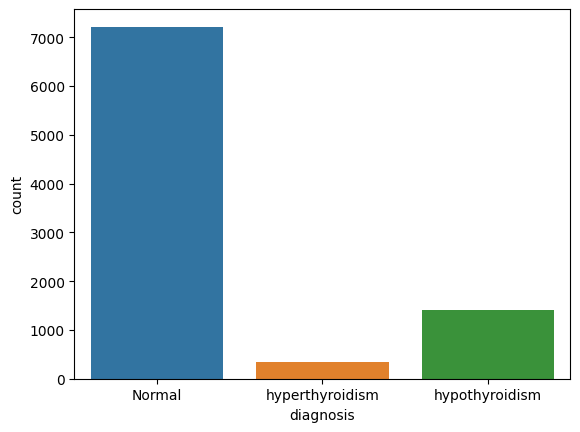

In [36]:
sns.countplot(data=df, x="diagnosis", hue = "diagnosis")

As we can see alot of our samples are normaly classifed, this may lead the model to generalize better the normal state and misclassify the other problmatic conditions into a normal thyroid state.

## Pre-processing of the categorical features -

If we carefully observe the columns of the dataset we have for each bio marker a column that says it the measurement was taken on not, lets look more detailed to check if a measurement that was not taken has a missing values in the biomarker

### TSH -

lets look at the amount of TSH measured that is false

In [37]:
len(df[df["TSH measured"] == 'f'])

841

Next check the missing values

In [38]:
df[df["TSH measured"] == 'f']["TSH"].isnull().sum()

841

We can clearly see that where the measurement is false the TSH column has a missing value.

Well drop this column

In [39]:
df.drop("TSH measured", axis = 1, inplace = True)

### T3 -

lets look at the amount of T3 measured that is false

In [40]:
len(df[df["T3 measured"] == 'f'])

2581

Next check the missing values

In [41]:
df[df["T3 measured"] == 'f']["T3"].isnull().sum()

2581

We can clearly see that where the measurement is false the T3 column has a missing value.

Well drop this column

In [42]:
df.drop("T3 measured", axis = 1, inplace = True)

### TT4 -

lets look at the amount of T4U measured that is false

In [43]:
len(df[df["TT4 measured"] == 'f'])

442

Next check the missing values

In [44]:
df[df["TT4 measured"] == 'f']["TT4"].isnull().sum()

442

We can clearly see that where the measurement is false the TT4 column has a missing value.

Well drop this column

In [45]:
df.drop("TT4 measured", axis = 1, inplace = True)

### T4U -

lets look at the amount of TT4 measured that is false

In [46]:
len(df[df["T4U measured"] == 'f'])

800

Next check the missing values

In [47]:
df[df["T4U measured"] == 'f']["T4U"].isnull().sum()

800

We can clearly see that where the measurement is false the T4U column has a missing value.

Well drop this column

In [48]:
df.drop("T4U measured", axis = 1, inplace = True)

### FTI -

lets look at the amount of TT4 measured that is false

In [49]:
len(df[df["FTI measured"] == 'f'])

793

Next check the missing values

In [50]:
df[df["FTI measured"] == 'f']["FTI"].isnull().sum()

793

We can clearly see that where the measurement is false the FTI column has a missing value.

Well drop this column

In [51]:
df.drop("FTI measured", axis = 1, inplace = True)

### TBG measured -

lets look at the amount of TT4 measured that is false

In [52]:
len(df[df["TBG measured"] == 'f'])

8626

Next check the missing values

In [53]:
df[df["TBG measured"] == 'f']["TBG"].isnull().sum()

8626

We can clearly see that where the measurement is false the TBG column has a missing value.

Well drop this column

In [54]:
df.drop("TBG measured", axis = 1, inplace = True)

### Referral source -

We can see that the referral source, probably contain the institude, or body, that reffered the sunjec tot the study.

It is now relevant for the model, we will drop it

In [55]:
df.drop("referral source", axis = 1, inplace = True)

### Sex -

In [56]:
sex_pt = df.pivot_table(index ='diagnosis', columns='sex' ,aggfunc="size")
sex_pt

sex                 F     M
diagnosis                  
Normal           4586  2406
hyperthyroidism   283    46
hypothyroidism   1099   261

<Axes: xlabel='diagnosis', ylabel='count'>

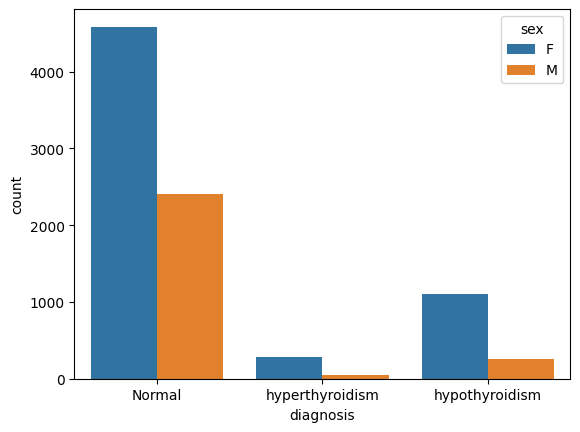

In [57]:
sns.countplot(data = df, x="diagnosis", hue= "sex")

Even though we know that we have a lot of females in the data set, it is best to also check each individual subgroup, relatively to complementary subproup to see if there is a tendancy for a perticular class in a subgroup compared to the genral raio of the variable.

Next we will calucalate the male percentages, in respect to the pivot table and to the general count of the variable.

The male general percentage in the df is:

In [58]:
male_general_ratio = len(df[df["sex"] == "M"])/len(df["sex"])*100
male_general_ratio

30.22841225626741

The male in the Normal subgroup percentage in the df is:

In [59]:
male_normal_ratio = sex_pt["M"]["Normal"]/(sex_pt["M"]["Normal"]+sex_pt["F"]["Normal"])*100
male_normal_ratio

34.410755148741416

The male in the hyperthyroidism subgroup percentage in the df is:

In [60]:
male_hyperthyroidism_ratio = sex_pt["M"]["hyperthyroidism"]/(sex_pt["M"]["hyperthyroidism"]+sex_pt["F"]["hyperthyroidism"])*100
male_hyperthyroidism_ratio

13.98176291793313

The male in the hypothyroidism subgroup percentage in the df is:

In [61]:
male_hypothyroidism_ratio = sex_pt["M"]["hypothyroidism"]/(sex_pt["M"]["hypothyroidism"]+sex_pt["F"]["hypothyroidism"])*100
male_hypothyroidism_ratio

19.191176470588236

From what we can see the normal functioning males are similar to the general distribution of the data, in contrast to that we can see that the males in the hypo/hyper subgroups have a lower tendency/trend to have a problem with their thyroid, by an average of more than 15% differnce.

A result that may be expected, becuase males and females have a different hormone composition, which may make the females more prone to thyroid problems.

The sex variable holds information that can contribute to the classification.

Next we will need to decide how to address the missing values.

A reasonble approach will be to fill the missing data by the pregnacy of the sample, because only a female can get pregnant, so for each 't' value in the 'pregnant' feature we will put 'F' in the 'sex' feature

In [62]:
index = df[(df["sex"].isnull()) & (df["pregnant"] == 't')].index

for i in index:
  df.at[i,'sex'] = 'F'

Lets check how many missing values are left

In [63]:
df['sex'].isnull().sum()

291

291 are left, as we mentioned before, this feature seems important, beause of the differance males and females have in their hormonal structure and filling the left samples will impact the results.

We will drop the missing 291 values, which is only 3% of the whole df

In [64]:
df.dropna(subset=["sex"], inplace=True)

In [65]:
df['sex'].isnull().sum()

0

### Pregnant -

In [66]:
df[(df["sex"] == "M") & (df["pregnant"] == "t")]

Empty DataFrame
Columns: [age, sex, on thyroxine, query on thyroxine, on antithyroid medication, sick, pregnant, thyroid surgery, I131 treatment, query hypothyroid, query hyperthyroid, lithium, goitre, tumor, hypopituitary, psych, TSH, T3, TT4, T4U, FTI, TBG, diagnosis]
Index: []

[0 rows x 23 columns]

Note we dont have any male that is pregnant, tested just in case, so we can be sure the that pregnant column are all women.

In [67]:
pregnant_pt = df.pivot_table(index ='diagnosis', columns='pregnant' ,aggfunc="size")
pregnant_pt

pregnant            f   t
diagnosis                
Normal           6963  30
hyperthyroidism   324   5
hypothyroidism   1291  71

From this pivot table we can see the the pregnant women are in a much higher risk for hypothyroidism, of about 180%, in comparison to the normal and hyperthyroidism subgroups.

The pregnant variable holds information that can contribute to the classification.

### Sick -

In [68]:
sick_pt = df.pivot_table(index ='diagnosis', columns='sick' ,aggfunc="size")
sick_pt

sick                f    t
diagnosis                 
Normal           6702  291
hyperthyroidism   322    7
hypothyroidism   1333   29

The male sick percentage in the df is:

In [69]:
sick_general_ratio = len(df[df["sick"] == "t"])/len(df["sick"])*100
sick_general_ratio

3.7655458314140953

The sick in the normal subgroup percentage in the df is:

In [70]:
sick_normal_ratio = sick_pt["t"]["Normal"]/(sick_pt["t"]["Normal"]+sick_pt["f"]["Normal"])*100
sick_normal_ratio

4.1613041613041615

The sick in the hyperthyroidism subgroup percentage in the df is:

In [71]:
sick_hyperthyroidism_ratio = sick_pt["t"]["hyperthyroidism"]/(sick_pt["t"]["hyperthyroidism"]+sick_pt["f"]["hyperthyroidism"])*100
sick_hyperthyroidism_ratio

2.127659574468085

The sick in the hypothyroidism subgroup percentage in the df is:

In [72]:
sick_hypothyroidism_ratio = sick_pt["t"]["hypothyroidism"]/(sick_pt["t"]["hypothyroidism"]+sick_pt["f"]["hypothyroidism"])*100
sick_hypothyroidism_ratio

2.129221732745962

We can see that the ratio of the sick people in the gorups are somewhat simillar.

Most of the people that were sick were diagnosed as not having any problem, shile there is a group of sick people that had thyroid problems.

A solid assumption will be that the subgroups that had problem with their thyroid, were sick because of it, or the were sick without any relation to the thyroid problem.

I the cases mentioned above, we can deduct the the sick feature, isnt needed and add noise.

We will remove it


In [73]:
df.drop("sick", axis = 1, inplace=True)

### Psych-

This feature tells us wether the subject has any psychological conditions.

It is safe to assume that if the sunject has a psychological condition, its is probably because his problematic thyroid condition(in he has one), and not the other way arround, meaning an individual wont get problems in his thyroid purely because of his mental state.

We will drop this feature.

In [74]:
df.drop("psych", axis = 1, inplace = True)

### Final note on the categorical features

The other columns that we have not addressed -

'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium','goitre', 'tumor', 'hypopituitary'

will be left as is, because they hold medical properties on the individual that may help identify his problematic thyroid and also we dont have any msising values in them.


## Pre-processing of the numerical features -

### age feature -

Lets look at the stats of the veriable

In [75]:
df['age'].describe()

count     8684.000000
mean        74.818977
std       1216.771832
min          1.000000
25%         37.000000
50%         55.000000
75%         68.000000
max      65526.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

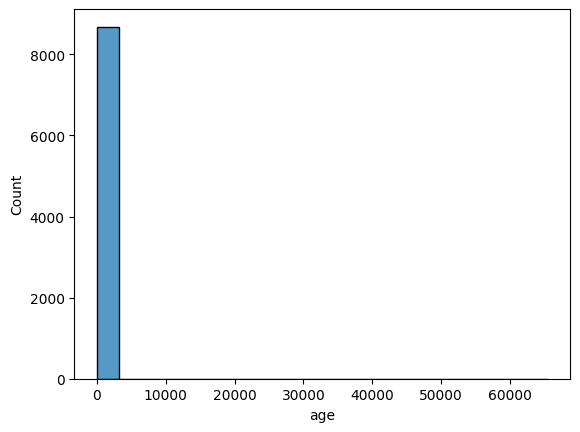

In [76]:
sns.histplot(data=df, x="age", bins = 20)

We can see that with a relative high bins count, the age variable suffers from a high STD because of its outliers, we will adress the ouliers with the IQR method for dealing with them

In [77]:
Q1 = df['age'].describe()["25%"]
Q3 = df['age'].describe()["75%"]
IQR = Q3 - Q1
factor = 1.5
IQRMax = Q3 + (IQR * factor)
IQRMin = Q1 - (IQR * factor)

outliers_indexes = df[(df['age'] < IQRMin) | (df['age'] > IQRMax)].index # filtering by the technique

df.drop(outliers_indexes, inplace=True) # dropping the outliers

Now lets check the distribution again

In [78]:
df['age'].describe()

count    8680.000000
mean       52.157143
std        18.887926
min         1.000000
25%        37.000000
50%        55.000000
75%        68.000000
max        97.000000
Name: age, dtype: float64

Now the age variable makes more sense when the younges sample might be a baby, and the oldest a 97 person.



#### Interactive histogram code

In [79]:
def update_hist(bins, stat):
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df,x='age', bins=bins, stat=stat, hue='diagnosis')
    plt.title(f'Histogram for age with {bins} bins and {stat}')
    plt.xlabel('age')
    plt.ylabel(f'{stat}')
    plt.show()

# Widgets for interactive controls
bins_slider = widgets.IntSlider(value=10, min=1, max=50, step=1, description='Bins:')
stat_dropdown = widgets.Dropdown(options=['count', 'frequency', 'density', 'probability'], value='count', description='Statistic:')

# Interactive output
output = widgets.interactive_output(update_hist, {'bins': bins_slider, 'stat': stat_dropdown})

#### Interactive histogram of the age variable

In [80]:
display(widgets.VBox([bins_slider, stat_dropdown, output]))

Now after the outliers are gone in the age feature we can see the interactibe histogram alot better.

Noice that by count, density, probability and no matter the number of bins, the three groups distribute the same.

We'll try boxplot for looking at the quartile to see if there is any difference

<Axes: xlabel='age'>

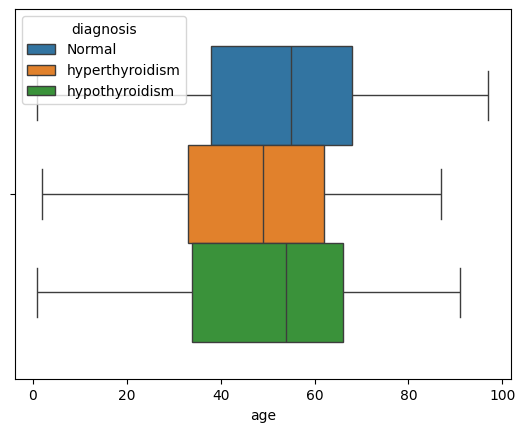

In [81]:
sns.boxplot(data=df,x='age', hue="diagnosis")

From instecting it more closely the three groups we can see that the hyper group has more of a tendecy towards a younger age than the hypo or normal group.

We will keep this column becuase it holds information that can help the model calssify better the hyper gorup.

### TSH feature -

In [82]:
df['TSH'].describe()

count    7868.000000
mean        5.259950
std        24.180225
min         0.005000
25%         0.460000
50%         1.400000
75%         2.700000
max       530.000000
Name: TSH, dtype: float64

#### Interactive histogram code

In [83]:
def update_hist(bins, stat):
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df,x='TSH', bins=bins, stat=stat, hue='diagnosis',shrink=True, log_scale = True)
    plt.title(f'Histogram for TSH with {bins} bins and {stat}')
    plt.xlabel('TSH')
    plt.ylabel(f'{stat}')
    plt.show()

# Widgets for interactive controls
bins_slider = widgets.IntSlider(value=10, min=1, max=100, step=1, description='Bins:')
stat_dropdown = widgets.Dropdown(options=['count', 'frequency', 'density', 'probability'], value='count', description='Statistic:')

# Interactive output
output = widgets.interactive_output(update_hist, {'bins': bins_slider, 'stat': stat_dropdown})

#### Interactive histogram of the age variable

In [84]:
display(widgets.VBox([bins_slider, stat_dropdown, output]))

As we can see TSH holds valuable information on the hypo class.

The indiviudals with higher TSH have a less functioning gland, we will use this variable and wont drop it.

### T3 feature -

In [85]:
df['T3'].describe()

count    6181.000000
mean        1.961738
std         0.880575
min         0.050000
25%         1.500000
50%         1.900000
75%         2.300000
max        18.000000
Name: T3, dtype: float64

#### Interactive histogram code

In [86]:
def update_hist(bins, stat):
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df,x='T3', bins=bins, stat=stat, hue='diagnosis',shrink=True, log_scale = True)
    plt.title(f'Histogram for T3 with {bins} bins and {stat}')
    plt.xlabel('T3')
    plt.ylabel(f'{stat}')
    plt.show()

# Widgets for interactive controls
bins_slider = widgets.IntSlider(value=10, min=1, max=100, step=1, description='Bins:')
stat_dropdown = widgets.Dropdown(options=['count', 'frequency', 'density', 'probability'], value='count', description='Statistic:')

# Interactive output
output = widgets.interactive_output(update_hist, {'bins': bins_slider, 'stat': stat_dropdown})

#### Interactive histogram

In [87]:
display(widgets.VBox([bins_slider, stat_dropdown, output]))

<Axes: xlabel='T3'>

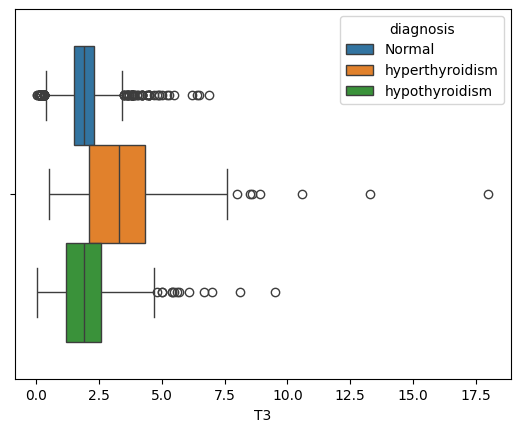

In [88]:
sns.boxplot(data=df,x='T3', hue="diagnosis")

From what we can see higher levels of T3 indicate that the individual has hyperthyroidsm and typicaly, lower T3 may also indicate(no so strongly) that he has hyorthyroidsm but it has some crossing with the Normal gorup.

We will keep this feature for that reason.

### TT4

In [89]:
df['TT4'].describe()

count    8260.000000
mean      107.853228
std        36.979271
min         2.000000
25%        87.000000
50%       104.000000
75%       124.000000
max       600.000000
Name: TT4, dtype: float64

#### Interactive histogram code

In [90]:
def update_hist(bins, stat):
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df,x='TT4', bins=bins, stat=stat, hue='diagnosis',shrink=True)
    plt.title(f'Histogram for TT4 with {bins} bins and {stat}')
    plt.xlabel('TT4')
    plt.ylabel(f'{stat}')
    plt.show()

# Widgets for interactive controls
bins_slider = widgets.IntSlider(value=10, min=1, max=100, step=1, description='Bins:')
stat_dropdown = widgets.Dropdown(options=['count', 'frequency', 'density', 'probability'], value='count', description='Statistic:')

# Interactive output
output = widgets.interactive_output(update_hist, {'bins': bins_slider, 'stat': stat_dropdown})

#### Interactive histogram

In [91]:
display(widgets.VBox([bins_slider, stat_dropdown, output]))

<Axes: xlabel='TT4'>

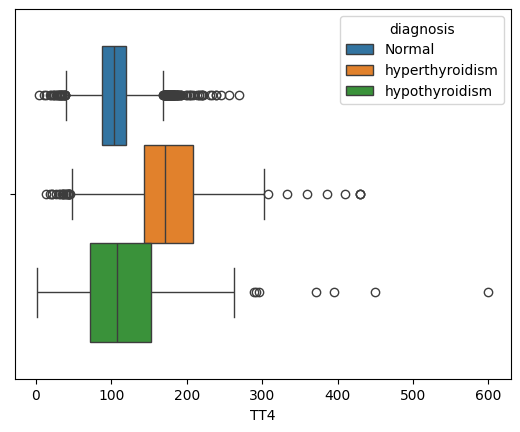

In [92]:
sns.boxplot(data=df,x='TT4', hue="diagnosis")

From what we can see higher levels of TT4 indicate that the individual has hyperthyroidsm and typicaly, lower T3 may also indicate(no so strongly) that he has hyorthyroidsm but it has some crossing with the Normal gorup.

We will keep this feature for that reason.

### T4U

In [93]:
df['T4U'].describe()

count    7914.000000
mean        0.979820
std         0.198512
min         0.170000
25%         0.860000
50%         0.960000
75%         1.070000
max         2.330000
Name: T4U, dtype: float64

#### Interactive histogram code

In [94]:
def update_hist(bins, stat):
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df,x='T4U', bins=bins, stat=stat, hue='diagnosis',shrink=True)
    plt.title(f'Histogram for T4U with {bins} bins and {stat}')
    plt.xlabel('T4U')
    plt.ylabel(f'{stat}')
    plt.show()

# Widgets for interactive controls
bins_slider = widgets.IntSlider(value=10, min=1, max=100, step=1, description='Bins:')
stat_dropdown = widgets.Dropdown(options=['count', 'frequency', 'density', 'probability'], value='count', description='Statistic:')

# Interactive output
output = widgets.interactive_output(update_hist, {'bins': bins_slider, 'stat': stat_dropdown})

#### Interactive histogram

In [95]:
display(widgets.VBox([bins_slider, stat_dropdown, output]))

<Axes: xlabel='T4U'>

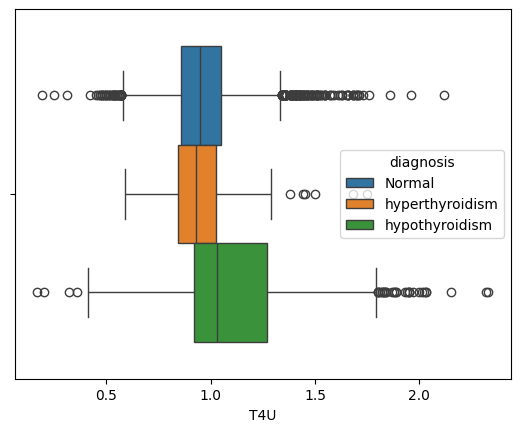

In [96]:
sns.boxplot(data=df,x='T4U', hue="diagnosis")

We can seee that typically higher values of T4U indicate that the individual has a hypothyroidism. THis will help us yo classify the hypo group better.

We will keep this feature for that reason.

### FTI

In [97]:
df['FTI'].describe()

count    7921.000000
mean      111.744135
std        36.391385
min         1.400000
25%        93.000000
50%       108.000000
75%       127.000000
max       642.000000
Name: FTI, dtype: float64

#### Interactive histogram code

In [98]:
def update_hist(bins, stat):
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df,x='FTI', bins=bins, stat=stat, hue='diagnosis',shrink=True)
    plt.title(f'Histogram for FTI with {bins} bins and {stat}')
    plt.xlabel('FTI')
    plt.ylabel(f'{stat}')
    plt.show()

# Widgets for interactive controls
bins_slider = widgets.IntSlider(value=10, min=1, max=100, step=1, description='Bins:')
stat_dropdown = widgets.Dropdown(options=['count', 'frequency', 'density', 'probability'], value='count', description='Statistic:')

# Interactive output
output = widgets.interactive_output(update_hist, {'bins': bins_slider, 'stat': stat_dropdown})

#### Interactive histogram

In [99]:
display(widgets.VBox([bins_slider, stat_dropdown, output]))

<Axes: xlabel='FTI'>

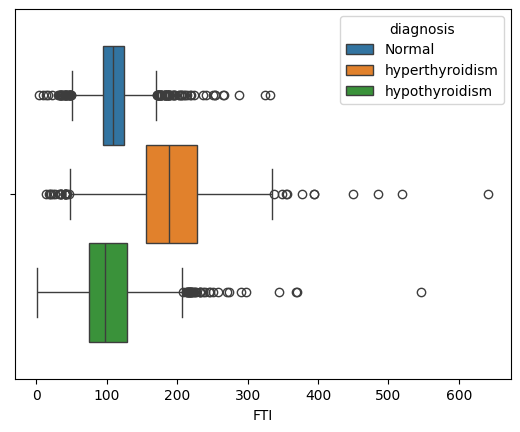

In [100]:
sns.boxplot(data=df,x='FTI', hue="diagnosis")

From what we can see about this feature is the it indicates pretty good that higher FTI levels imply hyper condition and lower levels hypo condition.

This feature hold good infomrtaion for classing both of the problematic groups better, we will keep it.

### TBG

In [101]:
df['TBG'].describe()

count    331.000000
mean      30.026133
std       21.542528
min        0.100000
25%       21.000000
50%       26.000000
75%       31.000000
max      200.000000
Name: TBG, dtype: float64

#### Interactive histogram code

In [102]:
def update_hist(bins, stat):
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df,x='TBG', bins=bins, stat=stat, hue='diagnosis',shrink=True)
    plt.title(f'Histogram for TBG with {bins} bins and {stat}')
    plt.xlabel('TBG')
    plt.ylabel(f'{stat}')
    plt.show()

# Widgets for interactive controls
bins_slider = widgets.IntSlider(value=10, min=1, max=100, step=1, description='Bins:')
stat_dropdown = widgets.Dropdown(options=['count', 'frequency', 'density', 'probability'], value='count', description='Statistic:')

# Interactive output
output = widgets.interactive_output(update_hist, {'bins': bins_slider, 'stat': stat_dropdown})

#### Interactive histogram

In [103]:
display(widgets.VBox([bins_slider, stat_dropdown, output]))

<Axes: xlabel='TBG'>

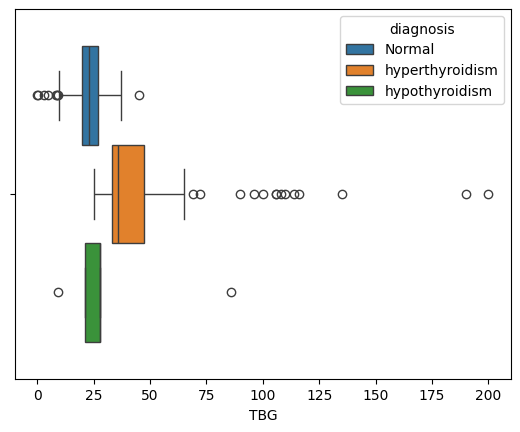

In [104]:
sns.boxplot(data=df,x='TBG', hue="diagnosis")

Although this feature is mostly untested (indicated by the missing values), this biomarker seems to be really important for identifying the hyperthrdoism condition.

We will no drop it for that reason.

### Final note on the numerical features

We chose not to fill in the missing values because we inferred that a missing values indicates that the biomakrer wasnt tested, we'll assume that the people who conducted the research deemed it not necessary.

For that reason we will leave them as is and not try to colpete them and add artifical noise that will impact our classification.

# Data transformation

In this section we will remap all of categorical features from string encoding to numerical encoding for our models.

In [106]:
cat_features = ['on thyroxine', 'query on thyroxine','on antithyroid medication', 'pregnant', 'thyroid surgery','I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium','goitre', 'tumor', 'hypopituitary']
for feature in cat_features:
  df[feature] = df[feature].apply(lambda line: 0 if line == "f" else 1)

df['sex'] = df['sex'].apply(lambda line: 0 if line == "F" else 1)

# Model choosing

Among the algorithms we explored in in this task, we exclude ID3 since it does not support missing values. Therefore, without filtering or correcting all the missing values, ID3 simply won't work on our input.

Secondly as we discuseed earlier we want the model to be more specific about the classification of the hyper/hypo classes, so an algorithm like C4.5 that does pruning will not be suitble, becuase it will make the model more generalized, thus classifying the normal condition better sacrificing the hypo/hyper conditions, which is not what we want from a medial model.

We are left with the CART and Random Forest algorithms which by default do not a pruned desicion trees.

The cart algotihms is more robust than the C4.5 because of its algorithm and the method for choosing the binary split in each node and not pruning by default which may help us in identifying the hypo/hyper classes better.

The random forest might be the most accurate model from the discussion, beause its is based of creating alot of desion trees and selecting the classification based on the majority vote, that can the model classify the problematic classes better.

# Pseudo code for the models

## CART desion tree algorithm

In [108]:
1  CARTDECISIONTREE(Sample S, Features F)
2  If stopping_condition(S, F) = true then
3      Leaf = createNode()
4      leafLabel = classify(S)
5      return leaf
6  root = createNode()
7  root.test_condition = findBestSplit(S, F)
8  V = {v | v a possible outcome of root.test_condition}
9  For each value v ∈ V:
10      S_v = {s | root.test_condition(s) = v and s ∈ S}
11      Child = TreeGrowth(S_v, F)
12      Add child as descent of root and label the edge {root → child} as v
13 return root

SyntaxError: invalid character '∈' (U+2208) (<ipython-input-108-451ea3728836>, line 9)

To construct a decision tree, the process begins by selecting the root node based on the Gini Index and highest Information Gain. In each iteration, the algorithm calculates the Gini Index and Information Gain for all unused nodes. It then selects the node with the lowest Gini Index or the highest Information Gain. The dataset is split into subsets based on this node. The algorithm continues to recursively apply these steps to each subset, ensuring that attributes used in splits are fresh, ultimately creating the decision tree.The CART algorithm grows the tree by exhaustively searching through all variables for each decision node and all possible splitting values. It selects the optimal split to minimize the misclassification rate, generating an estimate for the model's accuracy.

## Random Forest algorithm

In [ ]:
Precondition: A training set S := (x1, y1), . . . , (xn, yn), features F, and number of trees in forest B.
1  function RANDOMFOREST(S, F)
2      H ← ∅
3      for i = 1, . . . , B do
4          S(i) ← A bootstrap sample from S
5          hi ← RANDOMIZEDTREELEARN(S(i), F)
6          H ← H ∪ {hi}
7      end for
8      return H
9  end function
10 function RANDOMIZEDTREELEARN(S, F)
11     At each node:
12         f ← very small subset of F
13         Split on best feature in f
14     return The learned tree
15 end function

The Random Forest algorithm builds a collection of decision trees to boost predictive accuracy and stability. It starts by generating several decision trees using bootstrap sampling, where each tree is trained on a random subset of the training data with replacement.
At each split in a tree, a small random subset of features is chosen, and the best feature from this subset is used for the split. This introduction of randomness in both the data and feature selection helps ensure that the trees are diverse. The final model combines the predictions from all the individual trees, usually through majority voting for classification or averaging for regression, resulting in a more reliable and accurate prediction than any single decision tree could provide.

# Model evaluation

## Data splitting

In [128]:
X = df.drop('diagnosis',axis=1) # Replace 'target_variable' with your target column name
y = df['diagnosis']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

## Decision Tree Classifier

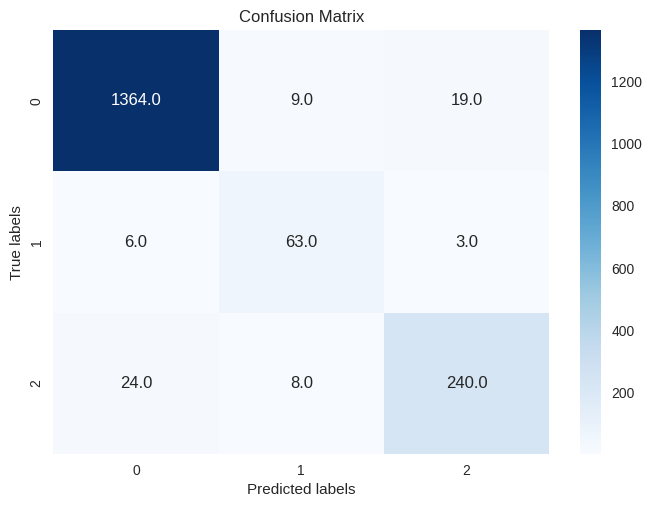

                 precision    recall  f1-score   support

         Normal    0.97848   0.97989   0.97918      1392
hyperthyroidism    0.78750   0.87500   0.82895        72
 hypothyroidism    0.91603   0.88235   0.89888       272

       accuracy                        0.96025      1736
      macro avg    0.89400   0.91241   0.90234      1736
   weighted avg    0.96077   0.96025   0.96037      1736



In [182]:
# Train the Decision Tree Classifier
DCT = DecisionTreeClassifier()
DCT.fit(X_train, y_train)

# Make predictions on the test set
y_pred = DCT.predict(X_test)

# Visualize confusion matrix using Seaborn
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues',fmt = ".1f")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate and print classification report
DCT_report = classification_report(y_test, y_pred,digits = 5)
print(DCT_report)

### ROC curves and AUC:

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


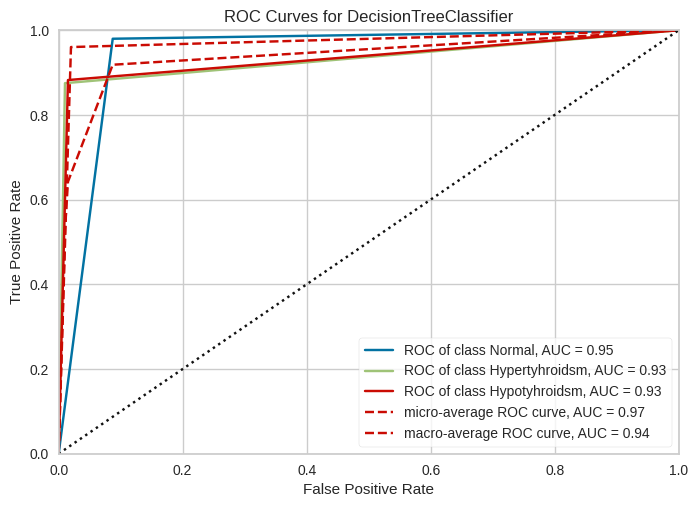

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       classes=['Normal', 'Hypertyhroidsm', 'Hypotyhroidsm'],
       estimator=DecisionTreeClassifier())

In [183]:
roc_auc(DCT, X_train, y_train, X_test=X_test, y_test=y_test, classes=['Normal','Hypertyhroidsm', 'Hypotyhroidsm'])

### CART Classification tree:

*click on the image to zoom in an wait for the image to render

In [172]:
fig = plt.figure(figsize=(200,200))
_ = tree.plot_tree(clf,
                   feature_names=X.columns,
                   class_names=y.unique(),
                   filled=True)

## Random Forest Classifier

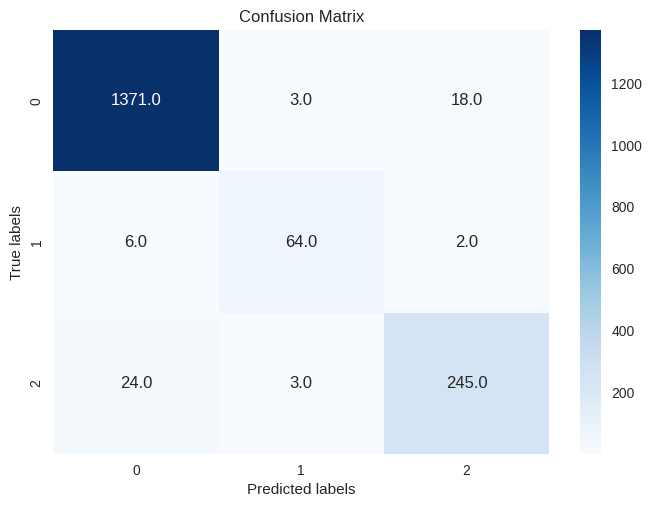

                 precision    recall  f1-score   support

         Normal    0.97859   0.98491   0.98174      1392
hyperthyroidism    0.91429   0.88889   0.90141        72
 hypothyroidism    0.92453   0.90074   0.91248       272

       accuracy                        0.96774      1736
      macro avg    0.93913   0.92485   0.93188      1736
   weighted avg    0.96745   0.96774   0.96756      1736



In [178]:
# Train the Random Forest Classifier
RFC = RandomForestClassifier(n_estimators=120)
RFC.fit(X_train, y_train)

# Make predictions on the test set
y_pred = RFC.predict(X_test)

# Visualize confusion matrix using Seaborn
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues',fmt = ".1f")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

RFC_report = classification_report(y_test, y_pred,digits = 5)
print(RFC_report)

### ROC curves and AUC:

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


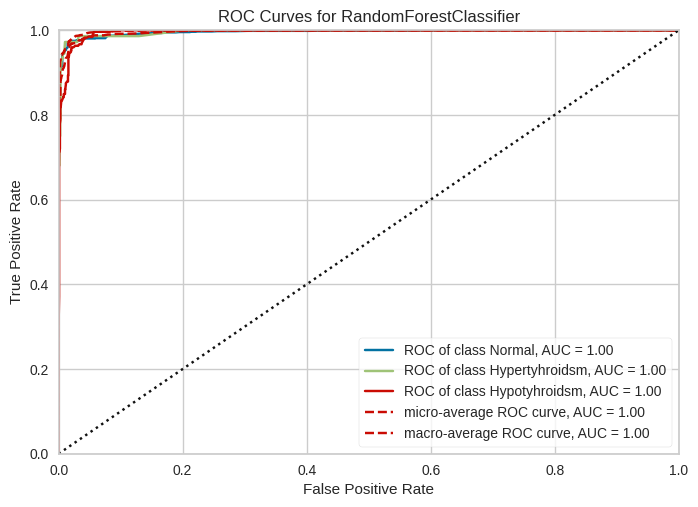

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       classes=['Normal', 'Hypertyhroidsm', 'Hypotyhroidsm'],
       estimator=RandomForestClassifier(n_estimators=120))

In [156]:
roc_auc(RFC, X_train, y_train, X_test=X_test, y_test=y_test, classes=['Normal','Hypertyhroidsm', 'Hypotyhroidsm'])

# Model comparison and discussion

Firstly lets look at the evaluation metrics of the models

CART:

In [184]:
print(DCT_report)

                 precision    recall  f1-score   support

         Normal    0.97848   0.97989   0.97918      1392
hyperthyroidism    0.78750   0.87500   0.82895        72
 hypothyroidism    0.91603   0.88235   0.89888       272

       accuracy                        0.96025      1736
      macro avg    0.89400   0.91241   0.90234      1736
   weighted avg    0.96077   0.96025   0.96037      1736



Random Forest:

In [185]:
print(RFC_report)

                 precision    recall  f1-score   support

         Normal    0.97859   0.98491   0.98174      1392
hyperthyroidism    0.91429   0.88889   0.90141        72
 hypothyroidism    0.92453   0.90074   0.91248       272

       accuracy                        0.96774      1736
      macro avg    0.93913   0.92485   0.93188      1736
   weighted avg    0.96745   0.96774   0.96756      1736



From an overall look at all the metrics we can see the the Radom Forest does a better job at classifying every thing.

Notice that the overral accuracy of the models is quite high, for it is expected because the vast majoraty of the dataset are healthy people and the models will have a tendecy to classify them as normal. For that reason this score isnt a significant importance, bith are at the 96% acc range.

Lets look more carefuly,

Firstly we will look at the 'Normal' class, we can see that the scores are almost identical, but the random forest has a much better recall score, which means the we calssify normal people as normal and dont tend to classify them as having a thyroid problrm.

Next, we will look at the more valuable class for our medical model which will be the hyperthyroidism and the hyperthyroidism class.

We can see from all markers, precision,recall metrics that the random forest does a great job at identifying the hyperthyroidism and the hyperthyroidism conditions, likely due to its 'majority vote' based on 120 trees, unlike the CART tree, which is a single decision.

The recall is much better, which means that we dont tend to classify the 'hyperthyroidism' as 'normal' or 'hypothyroidism', the same applies to the 'hypothyroidism', we have a lower tendancy to wrongly classify the people that have the problem correctly.

We also had a great jump in the precision metric which means that we dont tend to classify the 'normal' or 'hypothyroidism' as 'hyperthyroidism' and the same applesif or 'normal' or 'hyperthyroidism'.

Overall the F1 score is higher also in the random forest because of is nature in the recall and precision metrics, which also a great paramerter to asses the medial model.

This score means that our random forest model classifies much bettter the problematic classes as problematic, remember that it is really bad to classfiy a sick person as not sick, becuase he will not get the medical attention that he needs. Also the f1 score synonymously indicates that we dont classify healty people as sick.

In the end we see that the random forest and cart handle quite well classification of small subgorups like the hypo/hyper groups in comparison to the gigantic 'normal' group, altough the random forest wins this competition overall and especially in the recall score, due to its nature which is 'majority voting' that is based on 120 trees and lowering its chance for misclassification in comparison to the cart algortihm.

As a final note this dataset is really not balaced and we dont have too many samples from the hypo/hyper groups, so we had to use as much features as possible to dig them out, this may imply that the model wont handle 'real world' data that good because it is so specific for the small population of hyper/hypo.

It will be good if that data set will be more balanced and if that may not be possbile increase the data set to have more samples.